In [1]:
## importando as funcoes
from econometric_functions import *

## C2

In [2]:
df = get_data_stata('loanapp')

loanapp.dta was read successfully!


In [3]:
## Modelo probit
formula = "approve ~ white"

mod = probit_logit(formula, df)

                          Probit Regression Results                           
Dep. Variable:                approve   No. Observations:                 1989
Model:                         Probit   Df Residuals:                     1987
Method:                           MLE   Df Model:                            1
Date:                Thu, 14 Oct 2021   Pseudo R-squ.:                 0.05331
Time:                        18:35:24   Log-Likelihood:                -700.88
converged:                       True   LL-Null:                       -740.35
Covariance Type:            nonrobust   LLR p-value:                 6.408e-19
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5469      0.075      7.251      0.000       0.399       0.695
white          0.7839      0.087      9.041      0.000       0.614       0.954

###################################################

In [4]:
## Criando array
teste = np.array([[1, 0], [1, 1]])

In [5]:
## Prevendo valores usando a distribuição normal acumulada
# Brancos tem 90% de chance de aprovarem seus empréstimos; negros, 70,78%
# Como só temos uma variável e ela é binária, os resultados são idênticos ao dos modelos
# de probalidade linear
mod.predict()

array([0.90838786, 0.90838786, 0.90838786, ..., 0.90838786, 0.90838786,
       0.70779221])

## C10

In [2]:
## coletando os dados
df = get_data('SMOKE')
df

SMOKE.dta foi lido com sucesso!


,educ,cigpric,white,age,income,cigs,restaurn,lincome,agesq,lcigpric
0,16.0,60.506001,1,46,20000,0,0,9.903487,2116,4.102743
1,16.0,57.882999,1,40,30000,0,0,10.308952,1600,4.058424
2,12.0,57.664001,1,58,30000,3,0,10.308952,3364,4.054633
3,13.5,57.882999,1,30,20000,0,0,9.903487,900,4.058424
4,10.0,58.320000,1,17,20000,0,0,9.903487,289,4.065945
...,...,...,...,...,...,...,...,...,...,...
802,18.0,61.818001,0,52,30000,20,0,10.308952,2704,4.124195
803,18.0,61.675999,1,31,12500,0,0,9.433484,961,4.121895
804,16.0,60.707001,1,30,20000,0,0,9.903487,900,4.106059
805,10.0,59.987999,1,18,20000,0,0,9.903487,324,4.094144


In [3]:
#a) vendo quantas pessoas na amostra fugam x cigarros por dia
print(df['cigs'].value_counts())

# i) 497 pessoas dizem não fumar nenhum cigarro (61,5%), enquanto 101 (12,5%) reportam fumar 20 cigarros por dia. Esse grande número de pessoas pode se dar em virtude de 20 ser a quantidade de cigarros em uma caixa típica.

# ii) Dado o ponto de acumulação em cigs = 20, a distribuição Poisson pode não ser a mais apropriada, já que ela é determinada inteiramente por uma taxa de frequência e é uniforme.

0     497
20    101
30     42
40     37
10     28
15     23
60      8
1       7
25      7
5       7
50      6
2       5
3       5
12      4
8       3
18      3
28      3
6       3
13      2
4       2
11      2
9       2
35      2
7       2
80      1
16      1
19      1
33      1
55      1
14      1
Name: cigs, dtype: int64


In [4]:
## estimando um modelo poisson
formula = 'cigs ~ lcigpric + lincome + white + educ + age + agesq'
mod = poisson_reg(formula = formula, data = df)

# iii) A elasticidade-preço é -0,35 (o que faz sentido, já que é um bem viciante e inelástico) e a elasticidade-renda é 0,08.
# iv) Usando os erros-padrão normais, ambas as elasticidade são significantes ao nível de 5%, mas a elasticidade-preço não o é ao nível de 1%.
# v) σ é 4,54; como esperado, a distribuição não tem a propriedade de média = variância por não ser uma Poisson. Os erros-padrão precisam ser multiplicados por 4,54.

                          Poisson Regression Results                          
Dep. Variable:                   cigs   No. Observations:                  807
Model:                        Poisson   Df Residuals:                      800
Method:                           MLE   Df Model:                            6
Date:                Wed, 05 May 2021   Pseudo R-squ.:                 0.05342
Time:                        10:58:02   Log-Likelihood:                -8184.0
converged:                       True   LL-Null:                       -8645.9
Covariance Type:            nonrobust   LLR p-value:                2.853e-196
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4628      0.615      2.380      0.018       0.257       2.669
lcigpric      -0.3553      0.144     -2.468      0.014      -0.638      -0.073
lincome        0.0846      0.020      4.209      0.0

In [5]:
## calculando os novos erros-padrão e estatisticas t
t = mod.params/(mod.bse*4.54)
print("Estatísticas t:")
print(t)

# vi) as estatísticas t das elasticidades caem para menos de 1, tornando-as insignificantes até ao nível de 10%
# vii) educ e idade continuam bem significantes, com estatísticas t superiores a 3 e 5, respectivamente. O coeficiente de educ indica que um aumento de um ano na educação reduz o número de cigarros em aproximadamente 6%.

Estatísticas t:
Intercept    0.524332
lcigpric    -0.543628
lincome      0.927131
white       -0.011253
educ        -3.129646
age          5.114548
agesq       -5.340671
dtype: float64


In [6]:
## vendo os valores máximos e mínimos previstos
yhat = mod.predict()
print(f"O máximo é {max(yhat)} e o mínimo é {min(yhat)}")
# viii) O valor máximo previsto pelo modelo é 18,83, não prevendo nenhum valor de 20 cigarros por dia, muito visto na amostra. O mínimo é cerca de meio cigarro por dia (0,51), ou seja, todos da amostra fumariam ao menos um cigarro, algo que é bem longe da verdade nas observações

O máximo é 18.83566820399585 e o mínimo é 0.5150123221210979


Text(0, 0.5, 'Proporção da Distribuição dos Valores')

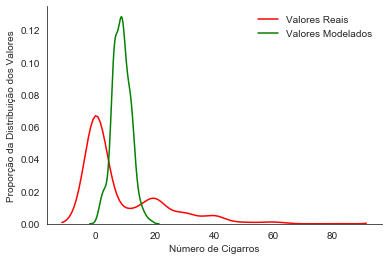

In [7]:
## plotando as distribuicoes
sns.set_style(style="white")
fig, ax = plt.subplots(figsize = (6,4))

# plottanndo as curvas
sns.distplot(df['cigs'], hist = False, color = 'r', label = 'Valores Reais', bins = 1)
sns.distplot(yhat, hist = False, color = 'g', label = 'Valores Modelados', bins = 1)
## deixando o gráfico bonitinho
sns.despine()
ax.legend(loc='upper right', frameon = False)
## labels dos eixos
ax.set_xlabel("Número de Cigarros", fontname = "Arial")
ax.set_ylabel("Proporção da Distribuição dos Valores", fontname = "Arial")

In [8]:
## calculando o pseudo-r2
df['cigshat'] = yhat
df[['cigshat','cigs']].corr()**2

# ix) O Pseudo R-quadrado é 0,043, indicando que os valores previstos não são um bom fit para os dados reais

,cigshat,cigs
cigshat,1.000000,0.043206
cigs,0.043206,1.000000


In [9]:
# fazendo o modelo por MQO
mod = OLS_reg(formula = formula, data = df)

# x) O R-quadrado do modelo de MQO - que busca maximizar essa variável - é cerca de 0,045. Assim, vê-se que nenhum dos modelos prevê bem os resultados, indicando que a previsão do número de cigarros fumados em um dia é difícil de ser feita com base nas características observáveis.

                            OLS Regression Results                            
Dep. Variable:                   cigs   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     6.300
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.74e-06
Time:                        10:58:04   Log-Likelihood:                -3239.5
No. Observations:                 807   AIC:                             6493.
Df Residuals:                     800   BIC:                             6526.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7669     24.079      0.239      0.8

## C11

In [10]:
df = get_data('CPS91')
df

CPS91.dta foi lido com sucesso!


,husage,husunion,husearns,huseduc,husblck,hushisp,hushrs,kidge6,earns,age,...,faminc,husexp,exper,kidlt6,hours,expersq,nwifeinc,inlf,hrwage,lwage
0,42,0.0,568,14,0,0,40,1,290.0,43,...,45000.0,22,23,0,0.0,529,29.920000,0,NaN,NaN
1,26,0.0,600,14,0,0,0,0,654.0,26,...,45000.0,6,6,0,0.0,36,10.992000,0,NaN,NaN
2,56,0.0,1500,14,0,0,40,1,100.0,49,...,55000.0,36,31,0,15.0,961,49.799999,1,6.666667,1.897120
3,35,NaN,0,12,0,0,40,0,0.0,35,...,55000.0,17,19,1,0.0,361,55.000000,0,NaN,NaN
4,42,0.0,450,11,0,0,45,1,0.0,43,...,27500.0,25,24,0,0.0,576,27.500000,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,30,0.0,1000,16,0,0,50,0,175.0,28,...,112500.0,8,6,0,24.0,36,103.400002,1,7.291667,1.986732
5630,30,0.0,350,16,0,0,40,0,0.0,31,...,3000.0,8,9,1,0.0,81,3.000000,0,NaN,NaN
5631,57,0.0,1000,14,0,0,20,0,781.0,55,...,112500.0,37,33,0,40.0,1089,71.888000,1,19.525000,2.971696
5632,52,0.0,1100,18,0,0,40,1,692.0,50,...,112500.0,28,26,0,35.0,676,76.515999,1,19.771429,2.984238


In [11]:
print(f"i) O número de mulheres na amostra que está na força de trabalho é {len(df['inlf'].loc[df['inlf'] == 1])} ({round(100*len(df['inlf'].loc[df['inlf'] == 1])/len(df['inlf']),2)}% do total).")

i) O número de mulheres na amostra que está na força de trabalho é 3286 (58.32% do total).


In [12]:
## estimando por MQO para aquelas que estão na FT
df1 = df.loc[df['inlf'] == 1]

formula = 'lwage ~ 1 + educ + exper + expersq + black + hispanic'
mod = OLS_reg(formula = formula, data = df1)
print(f"\n{mod.f_test('black = hispanic = 0')}")

# ii) Não parece haver diferença racial estatisticamente significante nos rendimentos das mulheres da força de trabalho uma vez controlado para os anos de educação e experiência. Um teste F da significância conjunta fornece um p-valor de 0,632.

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     169.1
Date:                Wed, 05 May 2021   Prob (F-statistic):          2.16e-160
Time:                        10:58:04   Log-Likelihood:                -2168.3
No. Observations:                3286   AIC:                             4349.
Df Residuals:                    3280   BIC:                             4385.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6488      0.060     10.820      0.0

In [13]:
## fazendo um modelo probit para determinar a participação na força de trabalho
formula = 'inlf ~ 1 + educ + exper + expersq + black + hispanic + nwifeinc + kidlt6'

mod = probit_logit(formula = formula, data = df)

# iii) A renda domiciliar que não é da esposa e a existência ou não de filhos pequenos parecem diminuir a probabilidade de participação na força de trabalho, sendo seus coeficientes bastante significantes estatisticamente. De fato, quanto maior a renda do resto do domicílio, menor a necessidade da mulher trabalhar. De forma semelhante, a presença de filhos pequenos faz com que a mulher tenha de ficar em casa para cuidar da criança, haja vista a atual configuração machista da sociedade.

# iv) A hipótese que fizemos é que, uma vez controlado para educação e experiência, a renda domiciliar que não é da esposa e a existência ou não de filhos pequenos não afetam sua remuneração, o que pode ser um pouco extremo, haja vista a existência de discriminação contra mulheres com filhos mais novos e o cansaço oriundo do cuidado das filhos afetar negativamente a produtividade, diminuindo o salário.

                          Probit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                 5634
Model:                         Probit   Df Residuals:                     5626
Method:                           MLE   Df Model:                            7
Date:                Wed, 05 May 2021   Pseudo R-squ.:                 0.07565
Time:                        10:58:05   Log-Likelihood:                -3537.3
converged:                       True   LL-Null:                       -3826.7
Covariance Type:            nonrobust   LLR p-value:                8.184e-121
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4393      0.134     -3.282      0.001      -0.702      -0.177
educ           0.0965      0.008     12.393      0.000       0.081       0.112
exper          0.0077      0.007      1.066      0.2

In [14]:
## fazendo o procedimento de heckman
sal = sm.add_constant(df[['educ','exper','expersq','black','hispanic']])
ft = sm.add_constant(df[['educ','exper','expersq','black','hispanic','nwifeinc','kidlt6']])

res = Heckman(df['lwage'], sal, ft).fit(method = 'twostep')

print(res.summary())

# v) O p-valor bilateral da estatística de Mills é 0,078, indicando que há uma seleção amostral a 10% de significância, mas não a 5%. Assim, conclui-se que não há viés de seleção amostral na estimação do salário.
# vi) Ao adicionarmos a razão de mills, o coeficiente de educação aumenta ligeiramente para 0,1033. De resto, há poucas mudanças e as dummies raciais continuam estatisticamente insignificantes.

       Heckman Regression Results      
Dep. Variable:                    lwage
Model:                          Heckman
Method:                Heckman Two-Step
Date:                  Wed, 05 May 2021
Time:                          10:58:10
No. Total Obs.:                    5634
No. Censored Obs.:                 2348
No. Uncensored Obs.:               3286
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5389      0.087      6.215      0.000       0.369       0.709
educ           0.1033      0.004     24.029      0.000       0.095       0.112
exper          0.0205      0.003      6.171      0.000       0.014       0.027
expersq       -0.0004   7.91e-05     -4.783      0.000      -0.001      -0.000
black         -0.0251      0.035     -0.727      0.467      -0.093       0.043
hispanic       0.0057      0.037      0.154      0.878      -0.066       0.078
        